<center>

# Relazione 9

</center>

**NB:** in questa esercitazione è utilizzata la libreria random.h, necessaria per generare uniformemente numeri casuali. Tale libreria si trova nella cartella RANDOM_GEN: per compilare è prima necessario utilizzare il comando 'source setup.sh'. Il file setup.sh si trova nella cartella LSN_Delivery

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
best_cer = np.loadtxt("Osservabili/best_circ.dat", unpack = True)
best_sq = np.loadtxt("Osservabili/best_sq.dat", unpack = True)

av_cer = np.loadtxt("Osservabili/mean_circ.dat", unpack = True)
av_sq = np.loadtxt("Osservabili/mean_sq.dat", unpack = True)

cerc = np.loadtxt("Config/best_circ.dat", unpack = True)
quad = np.loadtxt("Config/best_sq.dat", unpack = True)

init_circ = np.loadtxt("Config/circonferenza.dat", unpack = True)
init_sq = np.loadtxt("Config/quadrato.dat", unpack = True)

L'obiettivo dell'esercitazione 9 è trovare la soluzione migliore al problema del "Traveling Salesman": per ottenere questo risultato sarà necessario implementare un algoritmo genetico.

### Traveling Salesman Problem

Il problema del "Traveling Salesman" consiste in un venditore che per affari deve visitare un certo numero di città $N$ con il vincolo che in ognuna può passarvi una sola volta. Il venditore vuole capire quale sia la strada migliore da prendere, ossia quale sia il percorso più breve. Dette $\vec{c}_i$ le posizioni delle varie città, il percorso migliore sarà quello che minimizzerà una certa **funzione di costo**:
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

o
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
dove si ha che il vettore delle $\vec{x}_i$ è ottenuto mediante una permutazione di quello delle posizioni $\vec{c}_i$. Ogni permutazione delle $N$ città può essere ottenuta come composizione di permutazioni di coppie di città: questo fatto sarà altamente rilevante nel momento in cui sarà necessario inizializzare i cammini.

### Algoritmi Genetici

Gli algoritmi genetici consentono di risolvere problemi di ottimizzazione basandosi su un parallelismo con la selezione naturale e la genetica. Le regole dell'evoluzione genetica sono molto semplici, ossia le specie evolvono per mezzo di variazioni casuali (mutazione, ricombinazione) seguite da una selezione naturale in cui sopravvivono solamente gli elementi più allenati. Ogni elemento (nel nostro caso ogni cammino) è rappresentato da un cromosoma contenente un certo numero di geni, ciascuno dei quali si può presentare in più alleli. Come nel mondo animale i cromosomi che si riprodurranno di più sono quelli più allenati, ossia che presentano una funzione di costo minore. Un buon algoritmo genetico deve sempre presentare 3 tipi di operatori:

1. **selezione:** sceglie quali cromosomi si possano riprodurre nella popolazione. E' necessario che tale operatore si concentri sugli "individui" più allenati.

2. **cross-over:** una volta scelti due individui mediante cross-over, entrambi passano i loro cromosomi ai figli. Con una certa probabilità $p_{cross}$ è necessario che ci sia dello scambio di materiale genetico.

3. **mutazione:** cambio l'allele con cui si presenta il gene preso in considerazione

L'inizio del programma consiste nel generare $N_{pop}$ cromosomi di lunghezza l in maniera casuale. Per ogni cromosoma di calcola il fitness $f\left(x\right)$, step necessario per scegliere le coppie che andranno poi a riprodursi. Sui figli vengono effettuare le operazioni genetiche come cross-over oppure mutazioni. Infine in base al fitness degli elementi della popolazione "genitori + figli" si eliminano gli elementi più scadenti. La potenza degli algoritmi genetici risulta evidente dalle seguenti immagini:

<center>

![Alt text](Immagini/Quad.png)

</center>

<center>

![Alt text](Immagini/Cerc.png)

</center>

## <span style="color:blue"> Struttura del programma </span>

Il programma che ho scritto fa uso di 3 classi: Mappa, Cammino e Traveling Salesman.

<center>

### Mappa

</center>

La classe mappa è la classe che tiene conto della disposizione delle varie città. I data membri protetti sono il numero di città, un vettore contente le coordinate delle città ed una matrice che consente di valutare la funzione di costo. Per inizializzare un elemento di tipo Mappa è anche necessario specificare la geometria con la quale si vogliono disporre i centri abitati. Le possibilità sono due:
1. lungo una circonferenza (int forma $=$ 0)

2. all'interno di un quadrato (int forma $\neq$ 0)

Durante l'inizializzazione vengono calcolati gli elementi della "matrice di costo". L'elemento $M_{ij}$ è la distanza (oppure distanza quadra, dipende dalla funzione di costo scelta) fra la città i-esima e quella j-esima: l'ordine fra le città è dato da quando sono state generate le coordinate ad esse corrispondenti (le coordinate della città 1 sono state generate prima di quelle della città 2 e così via). Lavorare in questo modo ci consente di effettuare i calcoli necessari per ottenere il fitness dei vari cromosomi una sola volta, poichè sarà poi solo necessario accedere ai vari elementi di matrice (questo si fa con dei metodi get opportunamente implementati).


<center>

### Cammino

</center>

La classe cammino è quella che consente di rappresentare i singoli cromosomi. I data membri protetti sono la lunghezza, il costo e un vettore contenente la sequenza di città ordinate nel senso in cui esse si andrebbero a visitare. La sequenza di città viene inizializzata in modo casuale. Inizialmente riempio le celle del vettore in ordine crescente, ossia: 0, 1, 2, ... per poi effettuare un numero di scambi fra celle in numero pari alla lunghezza del vettore stesso. Gli indici delle celle sono scelti uniformemente e questo porta ad avere dei vettori con ordinamenti con buona approssimazione casuali. Di seguito una lista dei metodi importanti della classe Cammino:

- **Controllo():** questo metodo effettua un check sulle operazioni che vengono effettuate sul cromosoma. In particolare si concentra sul valore di inizio della sequenza (deve essere sempre la stessa città, indicata con 0), necessario per evitare ridondanza nelle possibili soluzioni esplorate dal programma, e sul fatto che non si devono avere ripetizioni di città.

- **Costo_V():** aggiorna il valore della loss function ogni volta che viene effettuato un cambiamento sul cammino.

- **Scambia(int i, int j):** scambia il contenuto della i-esima cella con quello della j-esima.

- **Scambia_seq(int iniz, int len):** scambia una sequenza di città che iniziano nella cella individuata dall'indice iniz e di lunghezza len con quella adiacente. In questo caso è necessario che len sottostia a dei certi limiti.

- **Sposta_seq(int iniz, int len, int dist):** scambia una sequenza di città che iniziano nella cella individuata dall'indice iniz e di lunghezza len con quella posta a distanza dist. In questo caso è necessario che len sottostia a dei certi limiti.

- **Inverti(int iniz, int len):** inverte una sequenza che inizia in un certo punto e caratterizzata da una certa lunghezza


<center>

### TravelingSalesman

</center>

La classe TravelingSalesman è quella che implementa effettivamente l'algoritmo genetico e che consente di gestire l'evoluzione della popolazione di cromosomi. I data membri protetti sono: la forma della città, il numero di cammini, la mappa con le disposizioni delle città, due contenitori per il valore della funzione di costo del miglior cammino e per quella della metà migliore, un vettore di cammini che contiene la popolazione nella sua interezza e un vettore per le probabilità di mutazione. I metodi importanti di questa classe sono:

- **Riordina():** questo metodo è un implementazione del selection sort. Questo viene utilizzato per odinare i percorsi dal più breve al più lungo.

- **GA(int n_gen, Random& rnd):** questo metodo consente di effettuare l'evoluzione della popolazione per mezzo dei metodi di Crossover e Mutazione che verranno illustrati in seguito. A ogni generazione il numero di accoppiamenti che si verificano è pari alla metà della popolazione con una concentrazione sui metodi più allenati mediante una opportuna scelta di indice: $j= int(M \times r^p)$ dove r è estratto uniformemente fra zero ed 1 e p è pari a 4. Sui figli faccio agire le mutazioni e poi li "appendo" al vettore della popolazione. Una volta riordinato lo stesso, tengo solo gli $N_{pop}$ più allenati.

- **CrossOver(Cammino& figl1, Cammino& figl2, Random& rnd):** effetta il crossover scegliendo a caso il punto in cui avviene l'inizio dello scambio di informazione genetica. Tale operazione avviene con probabilità di 0.7.

- **Mutazione(int i, Random& rnd):** effettua le varie mutazioni (ossia quelle implementate nella classe Cammino). L'indice i serve per scegliere su quale elemento della popolazione effettuare le mutazioni. Le possibili mutazioni sono 4 e si effettuano 4 "tentativi di mutazione": il tipo di mutazione da tentare viene scelto in maniera casuale estraendo uniformemente un numero fra 0 e 3. La prima mutazione che subisce il cromosoma può avvenire con una probabilità del 10%, la successiva del 5%, la terza del 3% e l'ultima dell'1%: subire 4 mutazioni è allora abbastanza irrealistico.

### Test metodi di generazione delle città

Per prima cosa è necessario verificare che i metodi per la creazione della mappa siano corretti. Per fare questo stampo le "mappe" delle città e verifico che rispettino le simmetrie richieste.

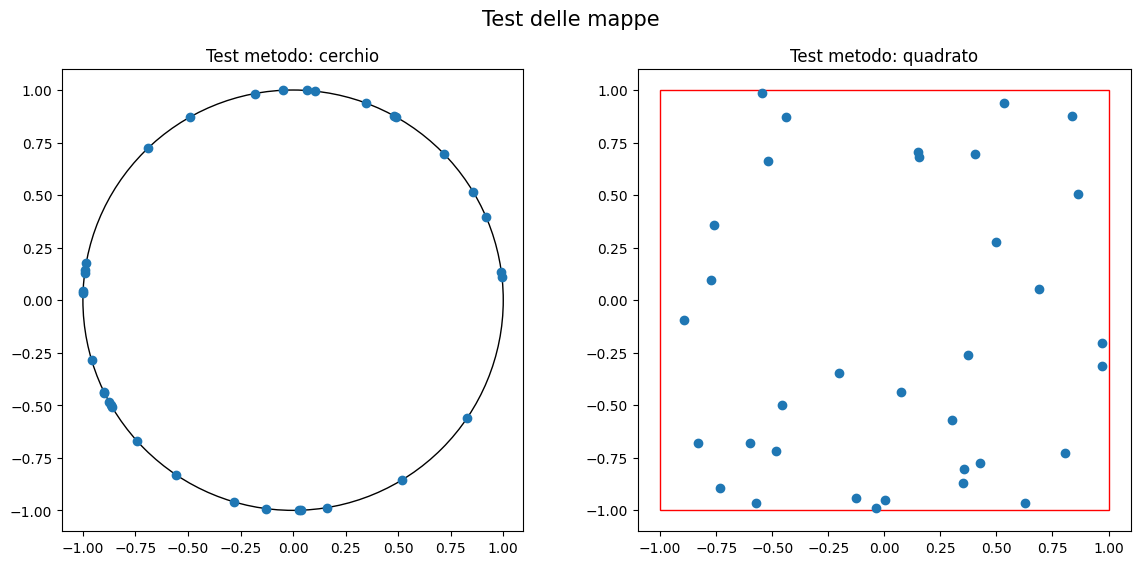

In [3]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
titoli = np.array(['Test metodo: cerchio', 'Test metodo: quadrato'])

for i in range(0, 2):

    if i==0:
        #Creo il cerchio
        cerchio = plt.Circle((0,0), 1, fill = False)
        ax[i].set_aspect(1)
        ax[i].add_artist(cerchio)

        ax[i].scatter(init_circ[ 0 , : ], init_circ[ 1 , :])

    else:
        #Creo il quadrato
        square = patches.Rectangle((-1,-1), 2, 2, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax[i].add_patch(square)
        
        ax[i].scatter(init_sq[ 0 , : ], init_sq[ 1 , :])

    ax[i].set_title(titoli[i])

fig.suptitle('Test delle mappe', fontsize = '15')
plt.show()

<center>

## <span style="color:blue"> Senza Cross-Over </span>

</center>

Prima di scrivere il metodo del cross-over ho effettuato l'ottimizzazione con le sole mutazioni e ciò che si osserva è che sia per il cerchio che per il quadrato si giunge ad una soluzione ottimizzata. Per entrambe le geometrie ho lavorato con:

$$
\begin{cases}
    N_{gen}\,=\, 1000\\
    N_{pop}\,=\,300
\end{cases}
$$

### Cerchio

Cammino migliore: 6.24306


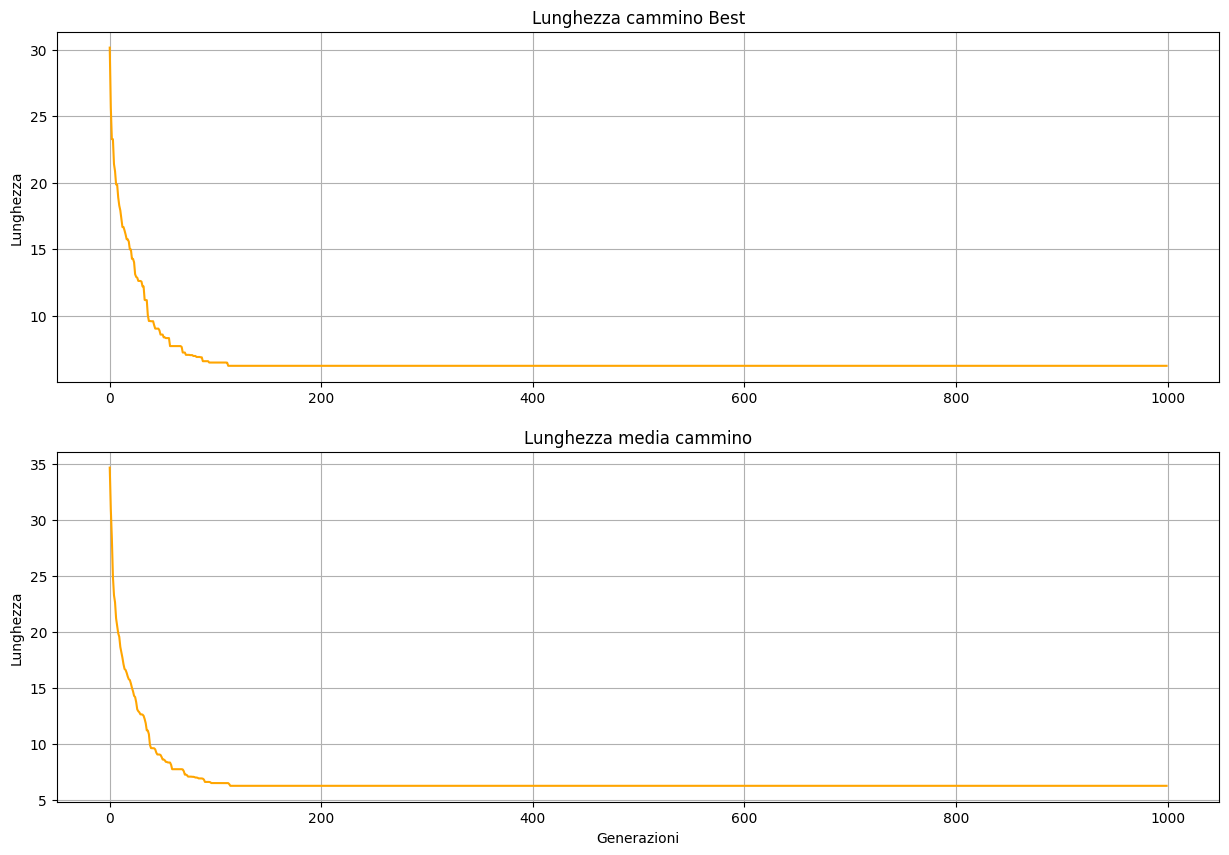

In [4]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
titoli = np.array(["Lunghezza cammino Best", "Lunghezza media cammino"])

for i in range(0, 2):
    if i==0:
        ax[i].errorbar(best_cer[0, 0:1000], best_cer[1, 0:1000], color = 'orange')

    else:
        ax[i].errorbar(av_cer[0, 0:1000], av_cer[1, 0:1000], color = 'orange')
    
    ax[i].set_title(titoli[i])
    ax[i].set_ylabel("Lunghezza")
    ax[i].grid(True)

print("Cammino migliore: " + str(best_cer[1, 999]))

ax[1].set_xlabel('Generazioni')
plt.show()

### Quadrato

Cammino migliore: 10.6401


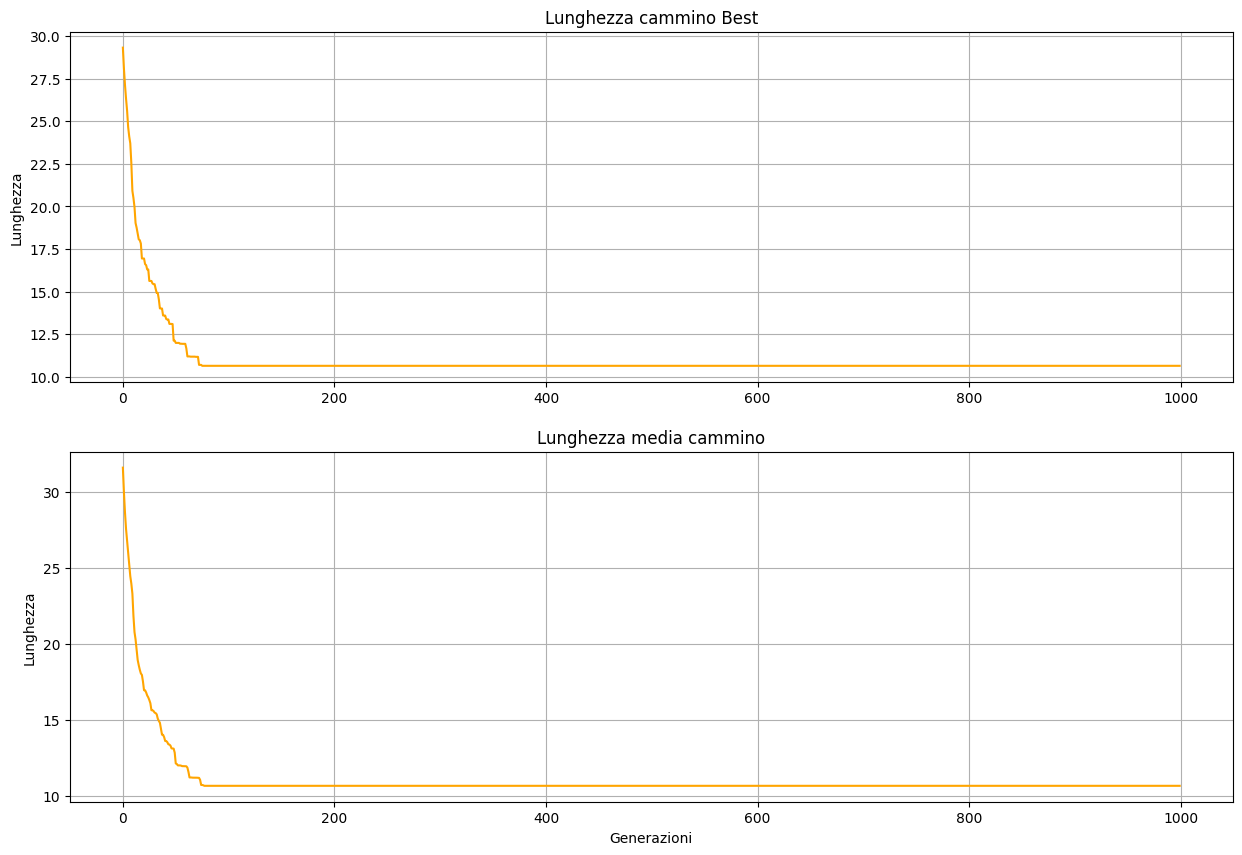

In [5]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
titoli = np.array(["Lunghezza cammino Best", "Lunghezza media cammino"])

for i in range(0, 2):
    if i==0:
        ax[i].errorbar(best_sq[0, 0:1000],best_sq[1, 0:1000], color = 'orange')

    else:
        ax[i].errorbar(av_sq[0, 0:1000],av_sq[1, 0:1000], color = 'orange')
    
    ax[i].set_title(titoli[i])
    ax[i].set_ylabel("Lunghezza")
    ax[i].grid(True)

print("Cammino migliore: " + str(best_sq[1, 999]))

ax[1].set_xlabel('Generazioni')
plt.show()

I percorsi ottimizzati ottenuti in questo caso sono:

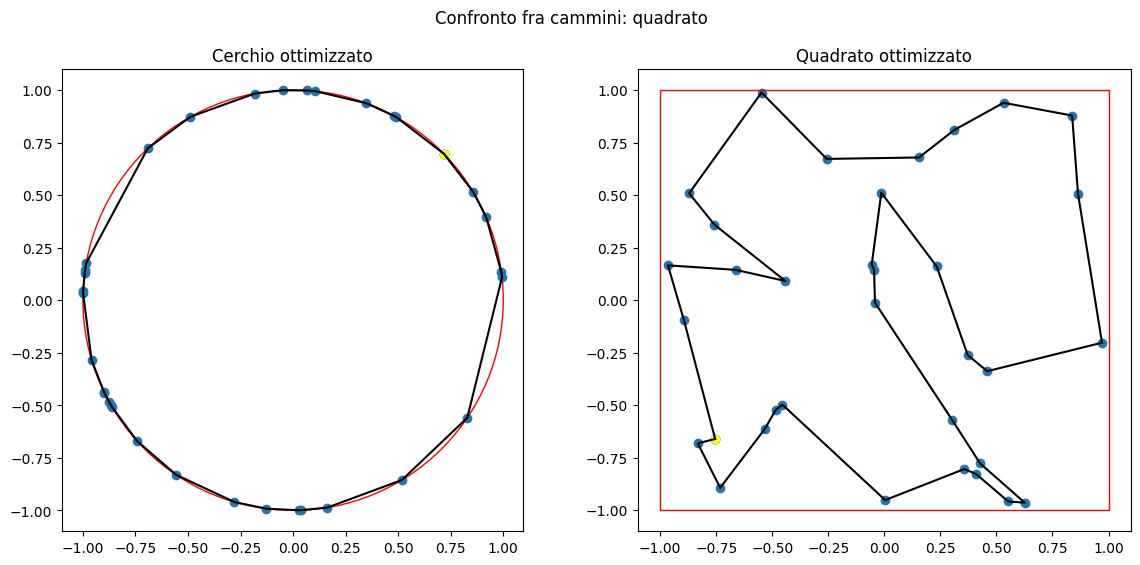

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
titoli = np.array(['Cerchio ottimizzato', 'Quadrato ottimizzato'])

for i in range(0, 2):
    if i==0:
        ax[i].scatter(cerc[ 0 , 0:35 ], cerc[ 1 , 0:35 ])
        ax[i].scatter(cerc[ 0 , 0], cerc[ 1 , 0], color = 'yellow')
        ax[i].plot(cerc[ 0 , 0:35], cerc[ 1 , 0:35], color = "black")

        cerchio = plt.Circle((0,0), 1, fill = False, color = 'red')
        ax[i].set_aspect(1)
        ax[i].add_artist(cerchio)

    else:
        ax[i].scatter(quad[ 0 , 0:35 ], quad[ 1 , 0:35 ])
        ax[i].scatter(quad[ 0 , 0], quad[ 1 , 0], color = 'yellow')
        ax[i].plot(quad[ 0 , 0:35], quad[ 1 , 0:35], color = "black")

        square = patches.Rectangle((-1,-1), 2, 2, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax[i].add_patch(square)

    

    ax[i].set_title(titoli[i])

fig.suptitle('Confronto fra cammini: quadrato')
plt.show()

<center>

## <span style="color:blue"> Con Cross-Over </span>

</center>

Lavoro ora anche con il cross-over. Anche in questo caso ho utilizzato:

$$
\begin{cases}
    N_{gen}\,=\, 1000\\
    N_{pop}\,=\,300
\end{cases}
$$

### Cerchio

Cammino migliore: 6.24306


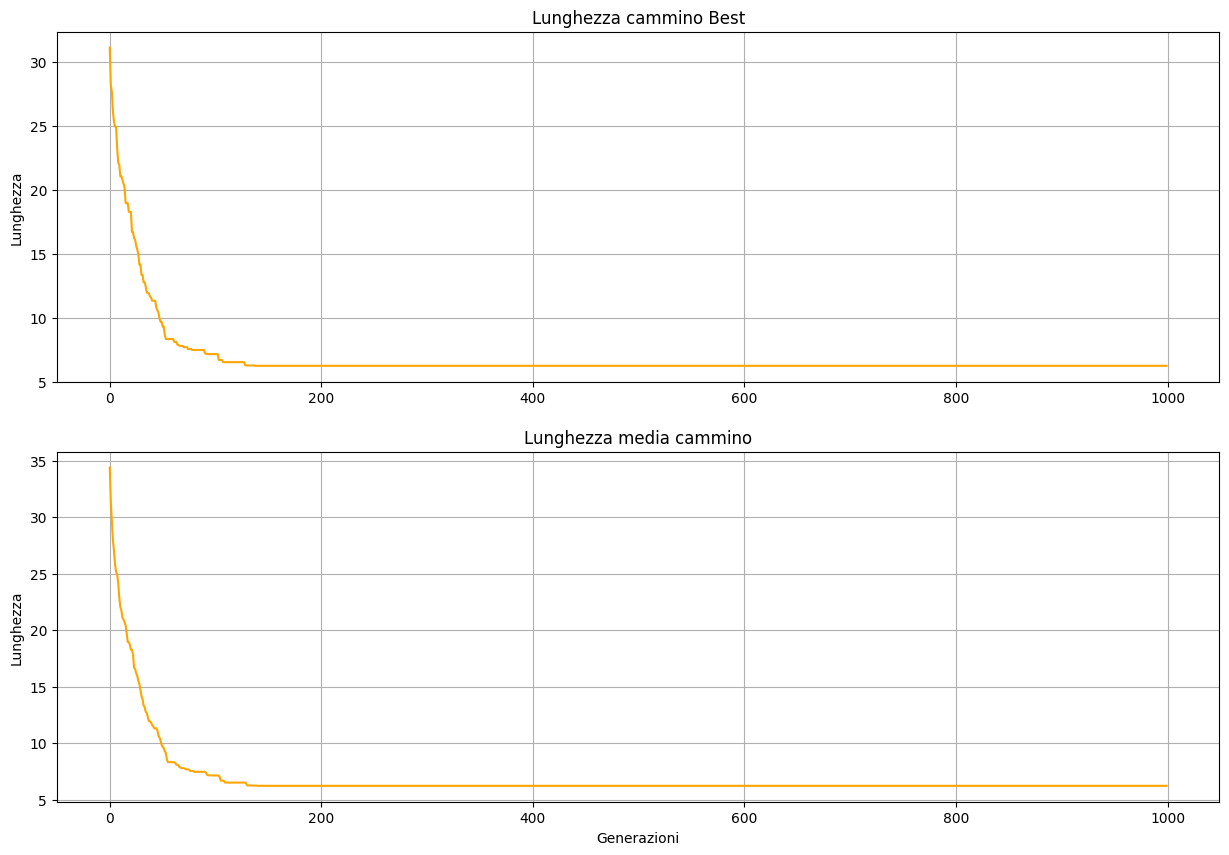

In [7]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
titoli = np.array(["Lunghezza cammino Best", "Lunghezza media cammino"])

for i in range(0, 2):
    if i==0:
        ax[i].errorbar(best_cer[0, 1000:2000], best_cer[1, 1000:2000], color = 'orange')

    else:
        ax[i].errorbar(av_cer[0, 1000:2000], av_cer[1, 1000:2000], color = 'orange')
    
    ax[i].set_title(titoli[i])
    ax[i].set_ylabel("Lunghezza")
    ax[i].grid(True)

print("Cammino migliore: " + str(best_cer[1, 1999]))

ax[1].set_xlabel('Generazioni')
plt.show()

### Quadrato

Cammino migliore: 10.2668


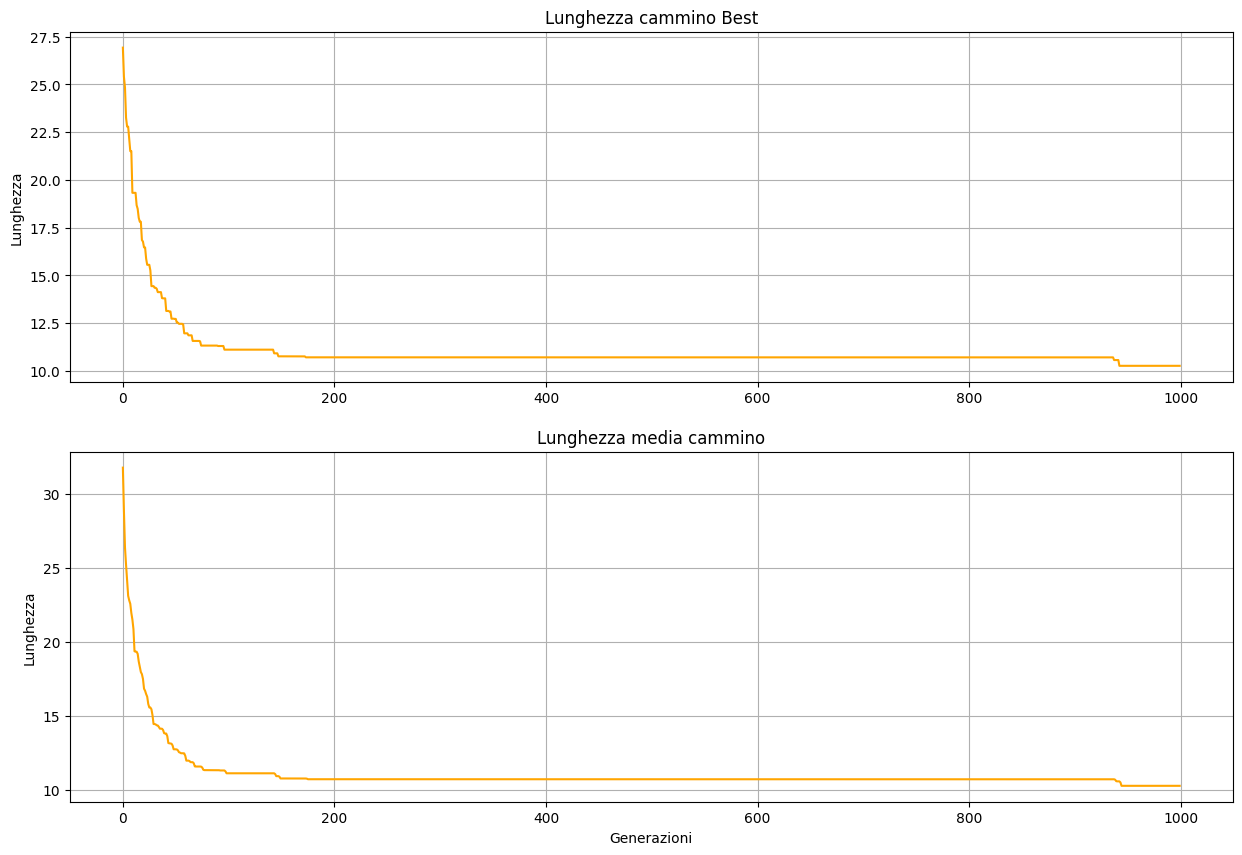

In [8]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
titoli = np.array(["Lunghezza cammino Best", "Lunghezza media cammino"])

for i in range(0, 2):
    if i==0:
        ax[i].errorbar(best_sq[0, 1000:2000],best_sq[1, 1000:2000], color = 'orange')

    else:
        ax[i].errorbar(av_sq[0, 1000:2000],av_sq[1, 1000:2000], color = 'orange')
    
    ax[i].set_title(titoli[i])
    ax[i].set_ylabel("Lunghezza")
    ax[i].grid(True)

print("Cammino migliore: " + str(best_sq[1, 1999]))

ax[1].set_xlabel('Generazioni')
plt.show()

E' interessante notare come dopo più di 900 generazioni si verifichi una mutazione che consente di ottenere una soluzione ancora migliore: questo rende evidente come "uscire" da dei minimi locali a volte risulta essere estremamente complesso. I percorsi ottimizzati ottenuti in questo caso sono:

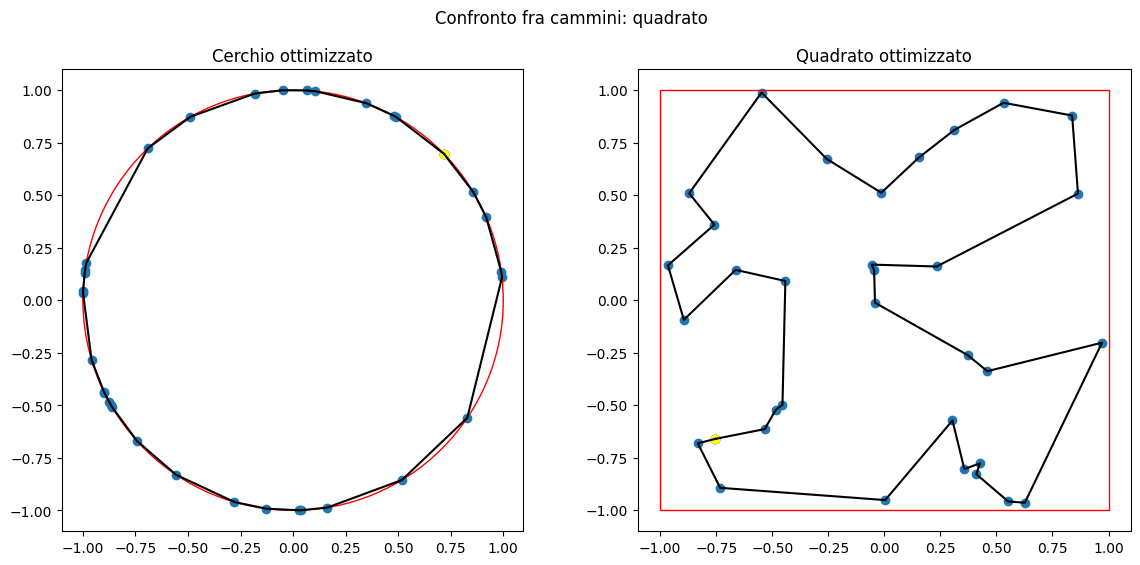

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
titoli = np.array(['Cerchio ottimizzato', 'Quadrato ottimizzato'])

for i in range(0, 2):
    if i==0:
        ax[i].scatter(cerc[ 0 , 35:70 ], cerc[ 1 , 35:70 ])
        ax[i].scatter(cerc[ 0 , 35], cerc[ 1 , 35], color = 'yellow')
        ax[i].plot(cerc[ 0 , 35:70], cerc[ 1 , 35:70], color = "black")

        cerchio = plt.Circle((0,0), 1, fill = False, color = 'red')
        ax[i].set_aspect(1)
        ax[i].add_artist(cerchio)

    else:
        ax[i].scatter(quad[ 0 , 35:70 ], quad[ 1 , 35:70 ])
        ax[i].scatter(quad[ 0 , 35], quad[ 1 , 35], color = 'yellow')
        ax[i].plot(quad[ 0 , 35:70], quad[ 1 , 35:70], color = "black")

        square = patches.Rectangle((-1,-1), 2, 2, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax[i].add_patch(square)

    

    ax[i].set_title(titoli[i])

fig.suptitle('Confronto fra cammini: quadrato')
plt.show()